## Simple Linear Regression

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("E:/Python and ML/Dataset/placement_package.csv")

In [26]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

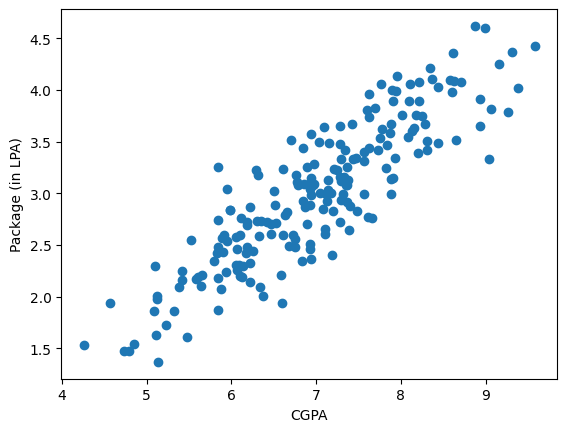

In [27]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")

In [34]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]


In [37]:

X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [47]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

e:\Python and ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in LPA)')

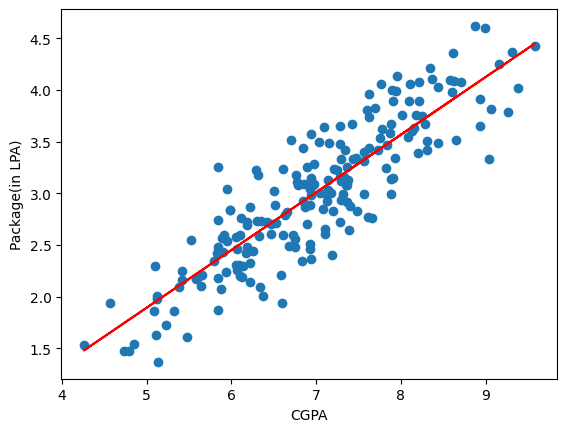

In [50]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_train, lr.predict(X_train),color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")

In [ ]:
# Slope of the best fit line
m = lr.coef_

In [ ]:
# Intercept of the best fit line
b = lr.intercept_

In [53]:
# Y = mX + b

In [54]:
m * 8.58 + b

array([3.89111601])

In [55]:
m * 9.5 + b

array([4.40443183])

In [56]:
m * 100 + b

array([54.89908542])

In [58]:
Y_pred = lr.predict(X_test)

In [59]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
print("MAE", mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [62]:
print("MSE", mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [63]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.34827051717731616


In [64]:
print("MSE", r2_score(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

MSE 0.780730147510384


In [65]:
1 - ((1 - r2) * (40 - 1)/(40 - 1- 1))

0.7749598882343415

In [67]:
new_df1 = df.copy()
new_df1["random_feature"] = np.random.random(200)

new_df1 = new_df1[["cgpa","random_feature", "package"]]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.030643,3.26
1,5.12,0.933477,1.98
2,7.82,0.715097,3.25
3,7.42,0.597614,3.67
4,6.94,0.516723,3.57


Text(0, 0.5, 'package (in LPA)')

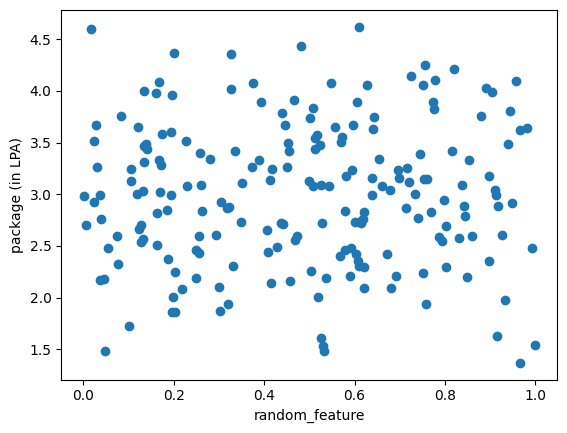

In [71]:
plt.scatter(new_df1["random_feature"], new_df1["package"])
plt.xlabel("random_feature")
plt.ylabel("package (in LPA)")


In [76]:
X = new_df1.iloc[:,0:2]
Y = new_df1.iloc[:, -1]


In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [78]:
lr = LinearRegression()

In [79]:

lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
y_pred = lr.predict(X_test)

In [81]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7843558381557831


In [82]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7726993969750147

In [83]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [84]:
new_df2.sample(5)

,cgpa,iq,package
32,6.96,3.88,3.08
184,7.88,2.34,3.14
79,7.18,4.00,3.00
91,6.22,3.14,2.14
78,6.59,2.91,2.21


Text(0, 0.5, 'Package(in lpa)')

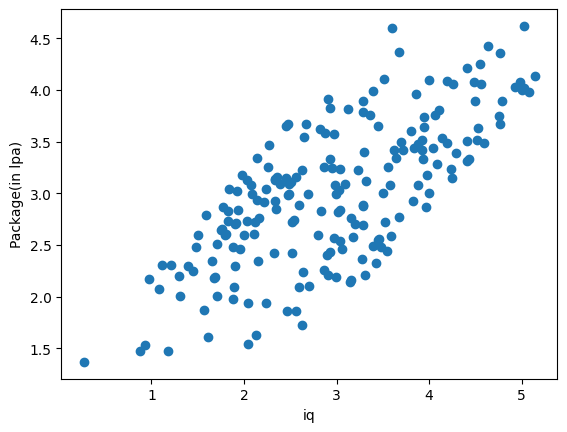

In [85]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [86]:

np.random.randint(-100,100)

-50

In [87]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [88]:

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [89]:

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7843558381557831


In [90]:

1 - ((1-r2)*(40-1)/(40-1-2))

0.7726993969750147